In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
ad_data = pd.read_csv('advertising.csv')

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
ad_data.shape

(1000, 10)

In [7]:
ad_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


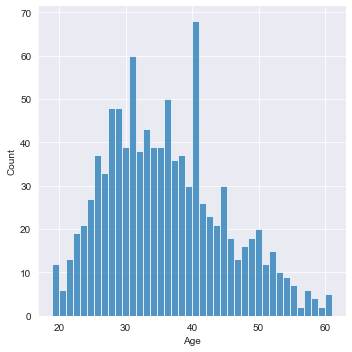

In [35]:
sns.set_style('darkgrid')
sns.displot(ad_data['Age'], kde=False, bins=40)

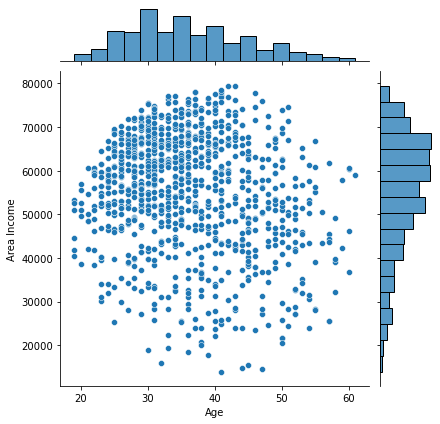

In [12]:
sns.jointplot(x='Age', y='Area Income', data=ad_data)

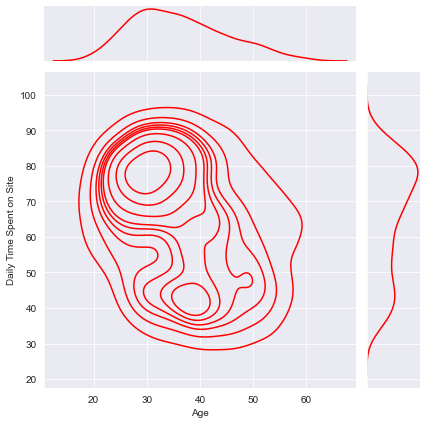

In [39]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',
              data=ad_data,color='red',kind='kde')

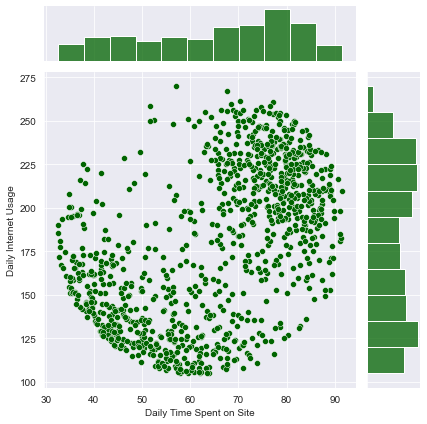

In [36]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', 
              color= 'darkgreen',data=ad_data)

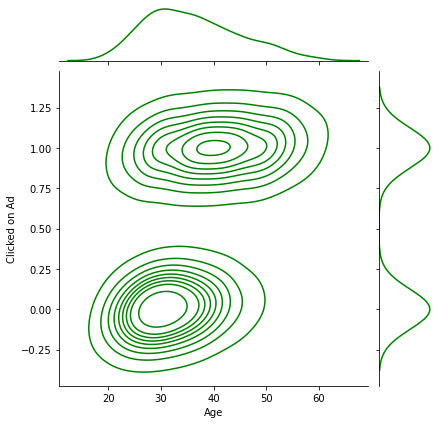

In [23]:
sns.jointplot(x='Age', y='Clicked on Ad',kind='kde', color='green', data=ad_data)

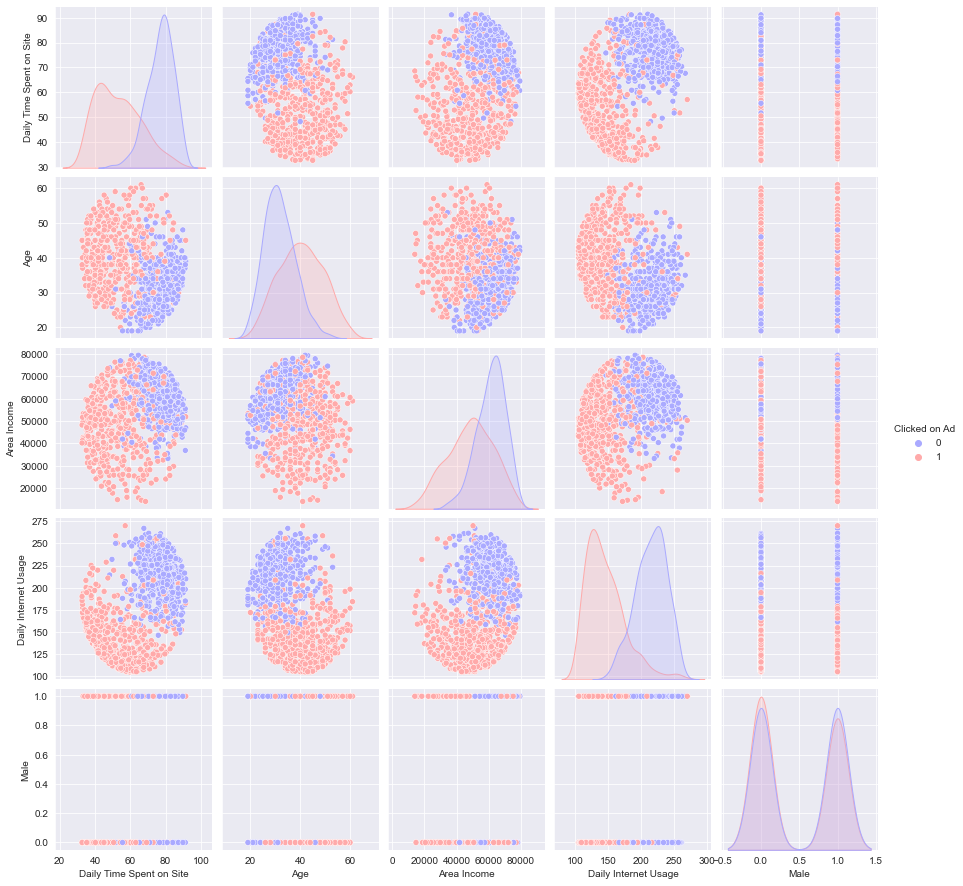

In [40]:
sns.pairplot(ad_data, hue='Clicked on Ad', palette='bwr')

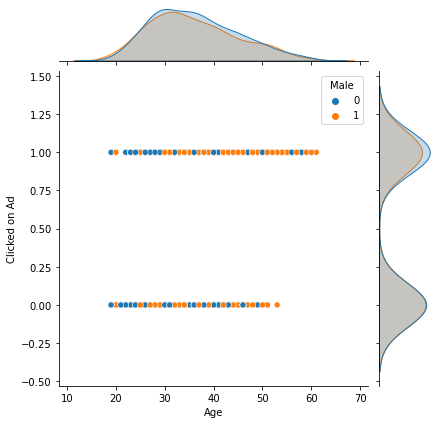

In [25]:
sns.jointplot(x='Age', y='Clicked on Ad',hue='Male', color='green', data=ad_data)

## Logistic Regression Model

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income',
             'Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Train and fit a logistic regression model on the training set

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

#### Predict and Evaluations

In [32]:
predictions = logmodel.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

[[149   8]
 [ 14 129]]
